<a href="https://colab.research.google.com/github/karmagurung00/Data_Analytics/blob/main/Track1/Python/FINAL__COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data analysis purpose

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')


In [ ]:
df.columns
column_to_be_dropped = ['fips']
df = df.drop(column_to_be_dropped, axis = 1)
df


,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0
...,...,...,...,...
17664,2021-01-17,Virginia,439305,5729
17665,2021-01-17,Washington,293296,3971
17666,2021-01-17,West Virginia,108821,1776
17667,2021-01-17,Wisconsin,568166,5907


In [ ]:
df.describe()

,cases,deaths
count,1.766900e+04,17669.000000
mean,1.190759e+05,2984.598053
std,2.274607e+05,5554.979599
min,1.000000e+00,0.000000
25%,4.587000e+03,98.000000
50%,3.417400e+04,774.000000
75%,1.334700e+05,3324.000000
max,3.006583e+06,40570.000000


In [ ]:
df.shape

(17669, 4)

In [ ]:
df['date']

0        2020-01-21
1        2020-01-22
2        2020-01-23
3        2020-01-24
4        2020-01-24
            ...    
17664    2021-01-17
17665    2021-01-17
17666    2021-01-17
17667    2021-01-17
17668    2021-01-17
Name: date, Length: 17669, dtype: object

In [ ]:
df.columns

Index(['date', 'state', 'cases', 'deaths'], dtype='object')

In [ ]:
df.head()

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0


In [ ]:
df.tail()

,date,state,cases,deaths
17664,2021-01-17,Virginia,439305,5729
17665,2021-01-17,Washington,293296,3971
17666,2021-01-17,West Virginia,108821,1776
17667,2021-01-17,Wisconsin,568166,5907
17668,2021-01-17,Wyoming,49363,522


# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

**1. Analyzing New York state data for Covid 19**

In [ ]:
df_ny=df[df['state']=='New York']
df_ny

,date,state,cases,deaths
246,2020-03-01,New York,1,0
261,2020-03-02,New York,1,0
276,2020-03-03,New York,2,0
293,2020-03-04,New York,11,0
313,2020-03-05,New York,22,0
...,...,...,...,...
17427,2021-01-13,New York,1179523,39760
17482,2021-01-14,New York,1193710,39997
17537,2021-01-15,New York,1213179,40203
17592,2021-01-16,New York,1229124,40376


In [ ]:
df_ny.mean()

cases     449848.142415
deaths     27816.811146
dtype: float64

In [ ]:
df_ny.groupby('state')['cases'].mean()

state
New York    449848.142415
Name: cases, dtype: float64

In [ ]:
df_ny.groupby('state')['deaths'].mean()

state
New York    27816.811146
Name: deaths, dtype: float64

In [ ]:
df_ny.groupby('state')['cases'].median()

state
New York    425568
Name: cases, dtype: int64

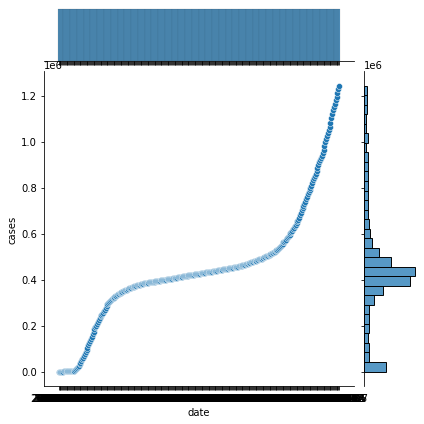

In [ ]:
sns.jointplot(x='date', y='cases', data=df_ny,kind='scatter')

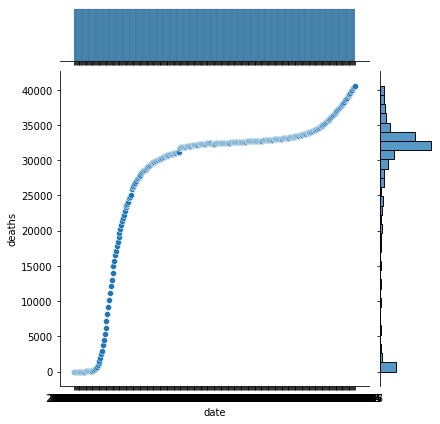

In [ ]:
sns.jointplot(x='date', y='deaths', data=df_ny,kind='scatter')

**2. Find new covid 19 cases daily basis (new cases added everyday)**

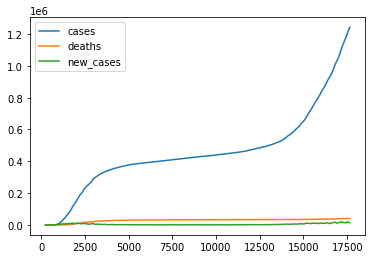

In [ ]:
df_ny.plot()

In [ ]:
newcases = []
previuos_cases = 0
for index, row in df_ny.iterrows():
  current_cases = row['cases']
  newcases_count = current_cases - previuos_cases
  previuos_cases = current_cases
  newcases.append(newcases_count)
  print(newcases_count)

1
0
1
9
11
22
45
17
36
31
44
109
95
189
122
218
425
1012
1774
2952
3258
4817
5711
4805
7413
5941
5688
8771
6266
7721
8707
8153
8996
10329
12274
8122
9304
8314
9568
10765
10794
10160
8435
6548
7402
11755
8631
7532
7249
6199
4867
4324
5659
6341
8286
10683
6013
4077
3285
4718
4702
3879
4559
3699
2524
2302
2746
3526
2873
2715
2138
1610
1438
2123
2364
2759
2185
1901
1241
1479
1478
2078
1678
1754
1601
1279
1044
1132
1758
1549
1363
1104
945
1361
1043
1053
1042
1083
777
712
690
664
724
821
912
694
623
630
561
626
794
707
665
555
598
575
738
804
697
624
391
458
628
872
919
725
536
516
590
691
588
790
727
679
559
913
834
767
778
752
509
519
855
706
810
758
748
532
613
535
711
779
642
754
531
542
746
639
694
720
706
513
478
667
706
736
724
738
609
410
662
626
599
707
651
581
404
629
568
789
635
635
709
649
757
710
888
863
799
729
525
557
573
756
861
849
725
586
767
653
893
793
983
865
575
751
666
953
909
1006
868
836
1188
1005
1383
1601
1728
1226
937
1394
1356
1835
1593
1448
1143
1032
1391
1235
1

In [ ]:
df_ny['new_cases'] = newcases
ny_cases = df_ny['cases']
ny_deaths = df_ny['deaths']
ny_dates = df_ny['date']
ny_new_cases = df_ny['new_cases']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


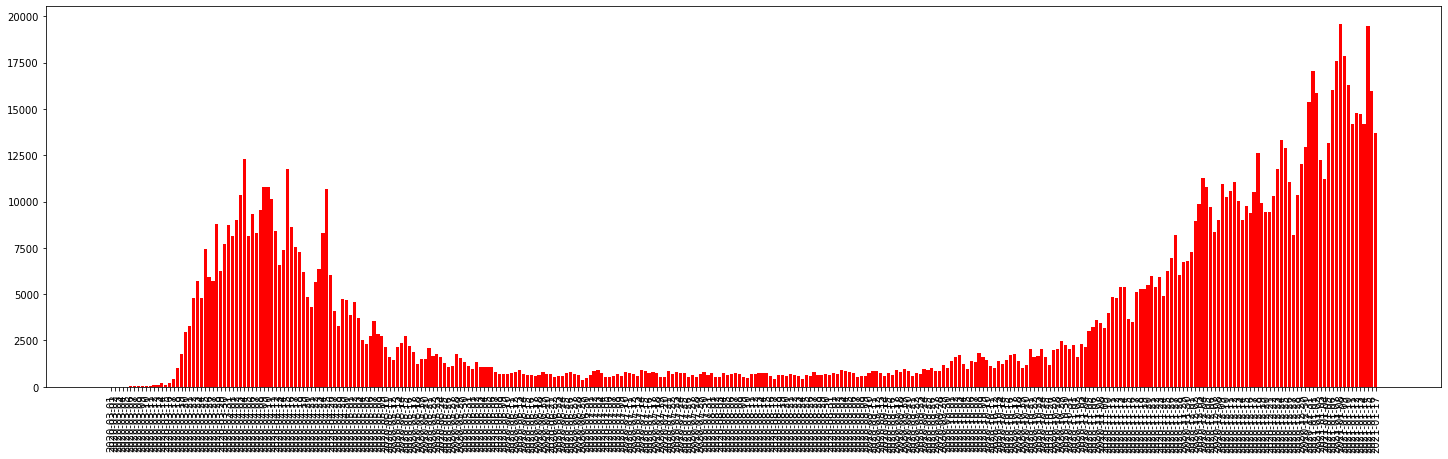

In [ ]:
plt.figure(figsize=(25,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
df_30=df_ny.tail(30)
df_30

,date,state,cases,deaths
16052,2020-12-19,New York,841946,35897
16107,2020-12-20,New York,851400,36017
16162,2020-12-21,New York,860856,36147
16217,2020-12-22,New York,871155,36300
16272,2020-12-23,New York,882895,36454
16327,2020-12-24,New York,896242,36604
16382,2020-12-25,New York,909123,36739
16437,2020-12-26,New York,920171,36870
16492,2020-12-27,New York,928376,37000
16547,2020-12-28,New York,938710,37118


In [ ]:
df_30.describe()

,cases,deaths
count,3.000000e+01,30.000000
mean,1.026245e+06,38053.433333
std,1.244613e+05,1408.537752
min,8.419460e+05,35897.000000
25%,9.222222e+05,36902.500000
50%,1.018038e+06,37927.500000
75%,1.131772e+06,39166.250000
max,1.242818e+06,40570.000000


In [ ]:
print('Average no of cases in last 30 days is',(1.026245e+06))
print('Average no of deaths in last 30 days is 38,053')

Average no of cases in last 30 days is 1026245.0
Average no of deaths in last 30 days is 38,053


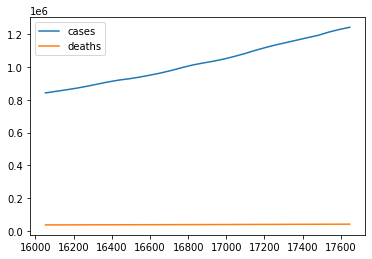

In [ ]:
df_30.plot()

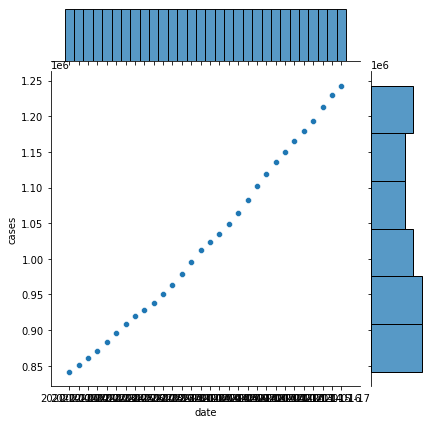

In [ ]:
sns.jointplot(x='date', y='cases', data=df_30)

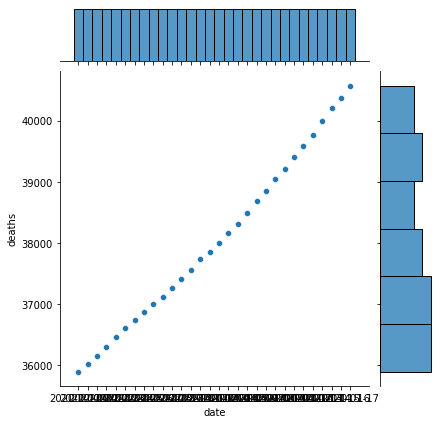

In [ ]:
sns.jointplot(x='date', y='deaths', data = df_30)

In [ ]:
nycases_30 = df_ny['cases'][-31:-1]
nydeaths_30 = df_ny['deaths'] [-31:-1]
nydates_30 = df_ny['date'][-31:-1]
ny_new_cases_30 = df_ny['new_cases'][-31:-1]

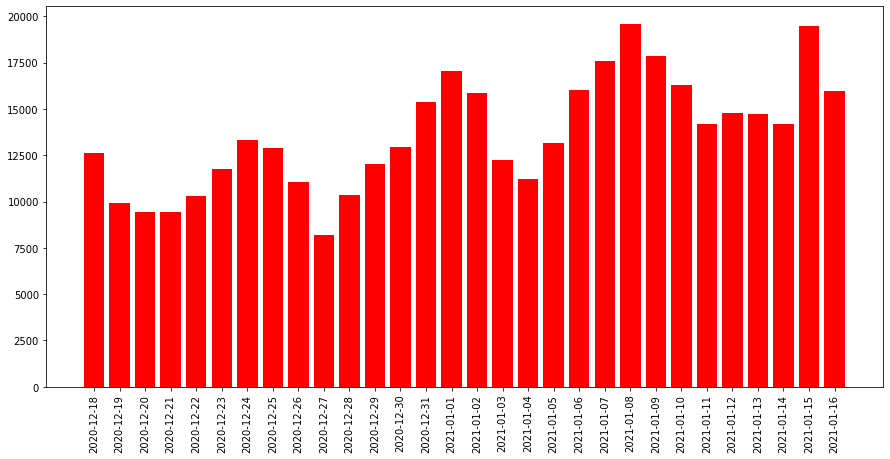

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=nydates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

# Task5: Comparing Covid 19 data with different states

**Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona**

In [ ]:
states = ['New York','California','Florida','Texas','Arizona']

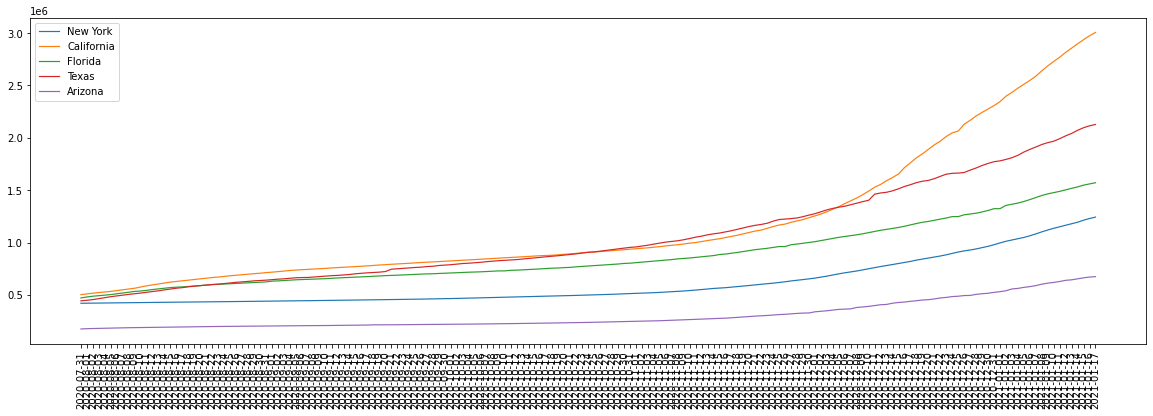

In [ ]:
#DATE VS CASES
plt.figure(figsize=(20,6))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-07-31')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=1.2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


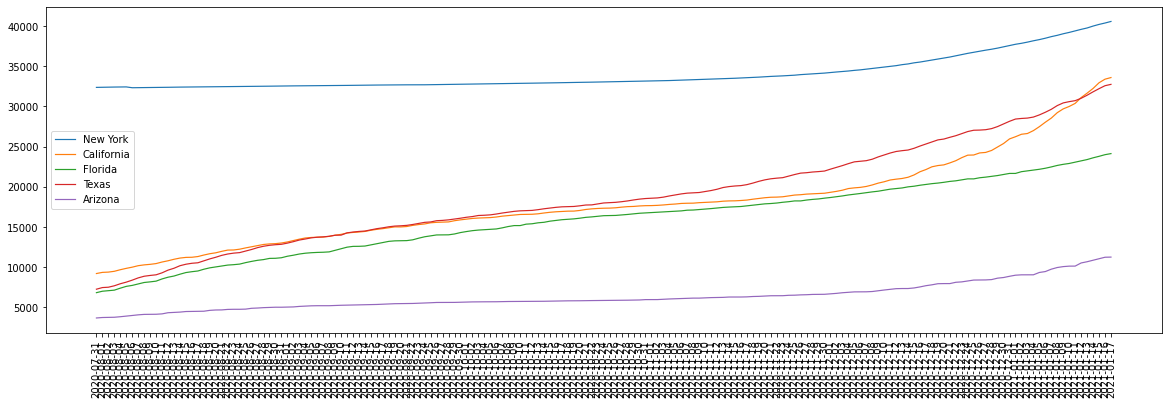

In [ ]:
#DATE VS DEATHS
plt.figure(figsize=(20,6))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-07-31')]
  plt.plot(df_st['date'],
           df_st['deaths'],
           linewidth=1.2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
df1.columns
column_to_be_dropped = ['fips']
df1 = df1.drop(column_to_be_dropped, axis = 1)
df1

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0
...,...,...,...,...
17664,2021-01-17,Virginia,439305,5729
17665,2021-01-17,Washington,293296,3971
17666,2021-01-17,West Virginia,108821,1776
17667,2021-01-17,Wisconsin,568166,5907


In [ ]:
july = df1[df1['date'] > '2020-07-31']


In [ ]:
NYjuly = july[july['state'] == 'New York']
NYjuly.mean()


cases     607702.452941
deaths     34021.552941
dtype: float64

In [ ]:
CAjuly = july[july['state'] == 'California']
CAjuly.mean()


cases     1.181627e+06
deaths    1.794621e+04
dtype: float64

In [ ]:
FLjuly = july[july['state'] == 'Florida']
FLjuly.mean()


cases     872936.529412
deaths     15894.770588
dtype: float64

In [ ]:
TXjuly = july[july['state'] == 'Texas']
TXjuly.mean()


cases     1.051909e+06
deaths    1.883595e+04
dtype: float64

In [ ]:
AZjuly = july[july['state'] == 'Arizona']
AZjuly.mean()


cases     303065.547059
deaths      6337.388235
dtype: float64

In [ ]:
dict={'State':['New York','California','Florida','Texas','Arizona'],'Average No.of Cases': ['607,702','1,181,627','872,936','1,051,909','303,065'],'Average No.of Deaths':['34,021','17,946','15,894','18,835','6,337']}
df3=pd.DataFrame(dict)
df3

,State,Average No.of Cases,Average No.of Deaths
0,New York,"607,702","34,021"
1,California,"1,181,627","17,946"
2,Florida,"872,936","15,894"
3,Texas,"1,051,909","18,835"
4,Arizona,"303,065","6,337"


In [ ]:
#ALL FLOAT conversions are done here.
#print(int(1.181627e+06))
#print(int(1.051909e+06))
#print(int(1.794621e+04))
#print(int(1.883595e+04))

# Task6: Conclusion

Below are the conclusions:



1."The no. of new cases for NewYork was relatively low for the first couple of weeks of the dataset but increased dramatically thereafter reaching new highs. At the beginning stages, the no one was well aware about the danger of the situation and no lockdown or travel restrictions were enforced.

As the situation got worse and worse by day, government protocols such as lockdowns helped to decrease the no of new cases. The cases slowly stabilized and stayed at low levels somewhere from mid-June till mid-September.

The cases started to rise drastically as of early October and is still going up reaching all time highs for no. of new cases daily (almost 20,000 at one point). The reason could be as the weather is better during August/September so people started going outdoors. As the cases were lower and the virus seemed to be under control, restrictions were slowly eased and the holiday seasons are to be blamed for the increase in no. of cases.

The last 30 days in NewYork state has experienced large no.of new cases daily.
     
2.California's total no. of cases is 3X more when compared to New York but has relatively less total no. of deaths. Also, New York and Arizona had a relatively low and stable no. of daily new cases when compared to three other states.


By July 31,2020, New York's no. of death was about 3X more than California, about 4X more than Florida and Texas, about 11X more than Arizona.




In [ ]:
conclusion={'State':['New York'],'Average(No.of Cases)': ['449,848'],'Average(No.of Deaths)':['27,816']}
df3=pd.DataFrame(conclusion)
df3

,State,Average(No.of Cases),Average(No.of Deaths)
0,New York,"449,848","27,816"
